In [1]:
"""Submisiion Dicoding , Diky """
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate\
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-04 15:32:21--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.77MB/s    in 50s     

2020-07-04 15:33:12 (6.10 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#extrack file
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir='/tmp/rockpaperscissors/rps-cv-images'
paper_dir=os.path.join(base_dir,'paper')
rock_dir=os.path.join(base_dir,'rock')
scissors_dir=os.path.join(base_dir,'scissors')

In [5]:
os.listdir(base_dir)

['scissors', 'paper', 'rock', 'README_rpc-cv-images.txt']

In [6]:
train_datagen=ImageDataGenerator(
    rotation_range=20, 
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
     )

In [7]:
validation_datagen=ImageDataGenerator(
    rotation_range=20, 
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)

In [8]:
train_generator=train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=4,
    class_mode='sparse',
    subset='training'
)
validation_generator=validation_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=4,
    class_mode='sparse',
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [9]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')                       
])

In [10]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [18]:
model.fit(
      train_generator,
      steps_per_epoch=30,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # erapa batch yang akan dieksekusi pada setiap epoch
      verbose=1,
      )

Epoch 1/25
30/30 [==============================] - 4s 137ms/step - loss: 0.1154 - accuracy: 0.9583 - val_loss: 0.2375 - val_accuracy: 0.9000
Epoch 2/25
30/30 [==============================] - 4s 135ms/step - loss: 0.0540 - accuracy: 0.9750 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3/25
30/30 [==============================] - 4s 136ms/step - loss: 0.1070 - accuracy: 0.9750 - val_loss: 0.0463 - val_accuracy: 0.9500
Epoch 4/25
30/30 [==============================] - 4s 136ms/step - loss: 0.0237 - accuracy: 1.0000 - val_loss: 0.1482 - val_accuracy: 0.9500
Epoch 5/25
30/30 [==============================] - 4s 135ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.0943 - val_accuracy: 0.9500
Epoch 6/25
30/30 [==============================] - 4s 136ms/step - loss: 0.0474 - accuracy: 0.9833 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 7/25
30/30 [==============================] - 4s 134ms/step - loss: 0.1512 - accuracy: 0.9500 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 

Using TensorFlow backend.


Saving 6ZuyUqrA3gcHdfCe.png to 6ZuyUqrA3gcHdfCe.png
[[0. 1. 0.]]
6ZuyUqrA3gcHdfCe.png
Rock


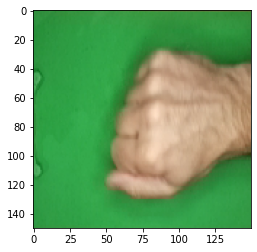

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(classes)
  
  print(fn)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  elif classes[0][2]==1:
    print('Scissors')
  else:
    print('Gambar Salah')